# Underdeterminedness of EGH Modeling

100%|██████████| 203/203 [00:44<00:00,  4.61it/s]
developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


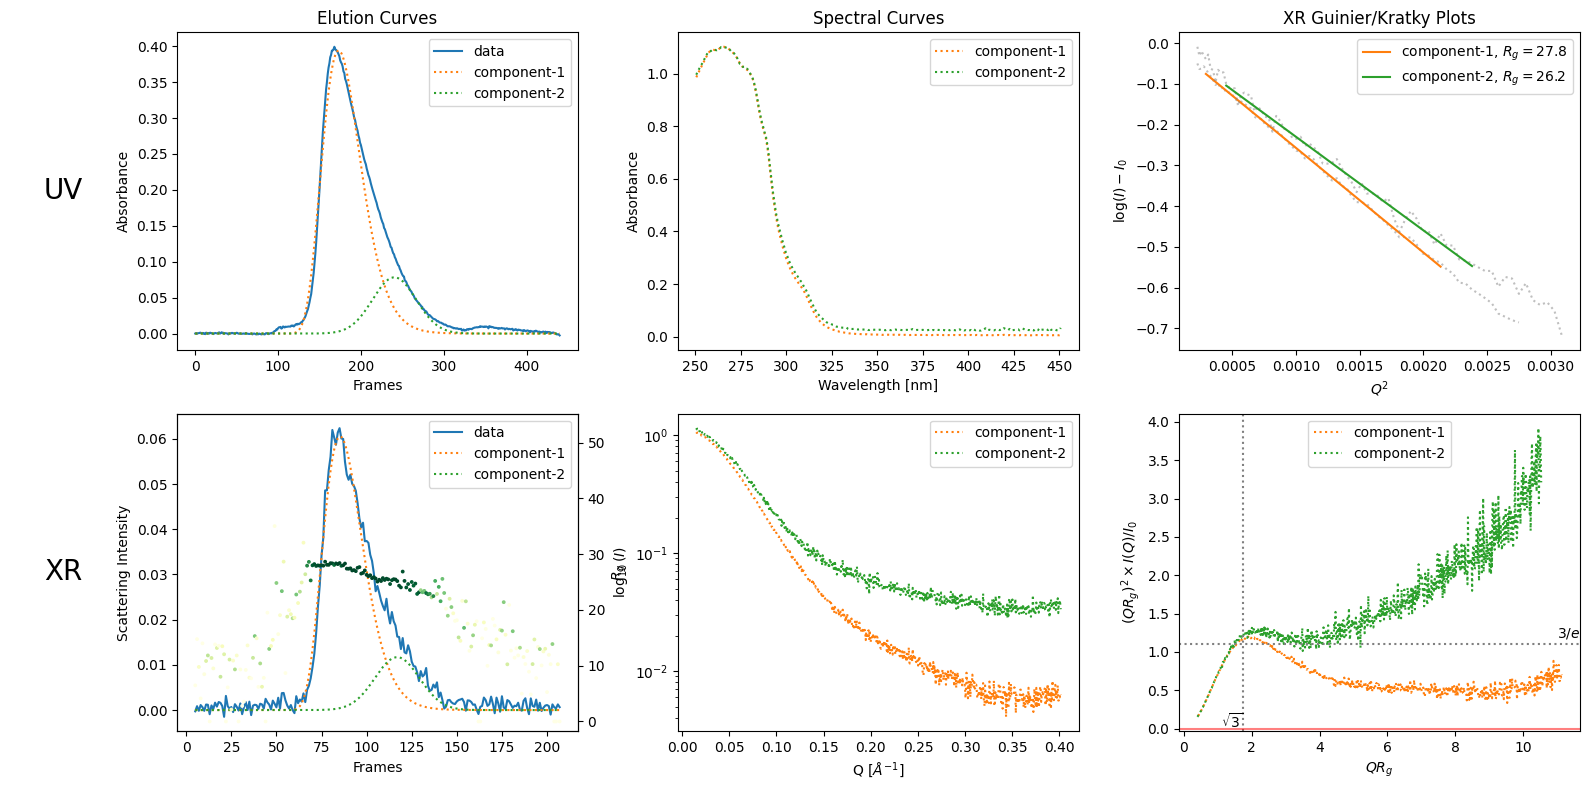

In [7]:
from molass import get_version
assert get_version() >= '0.4.0', "This tutorial requires molass version 0.4.0 or higher."
from molass_data import get_version
assert get_version() >= '0.3.0', "This tutorial requires molass_data version 0.3.0 or higher."
from molass_data import SAMPLE4
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE4)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
rgcurve = corrected_ssd.xr.compute_rgcurve()
decomposition = corrected_ssd.quick_decomposition(num_components=2)
plot1 = decomposition.plot_components(rgcurve=rgcurve) 

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


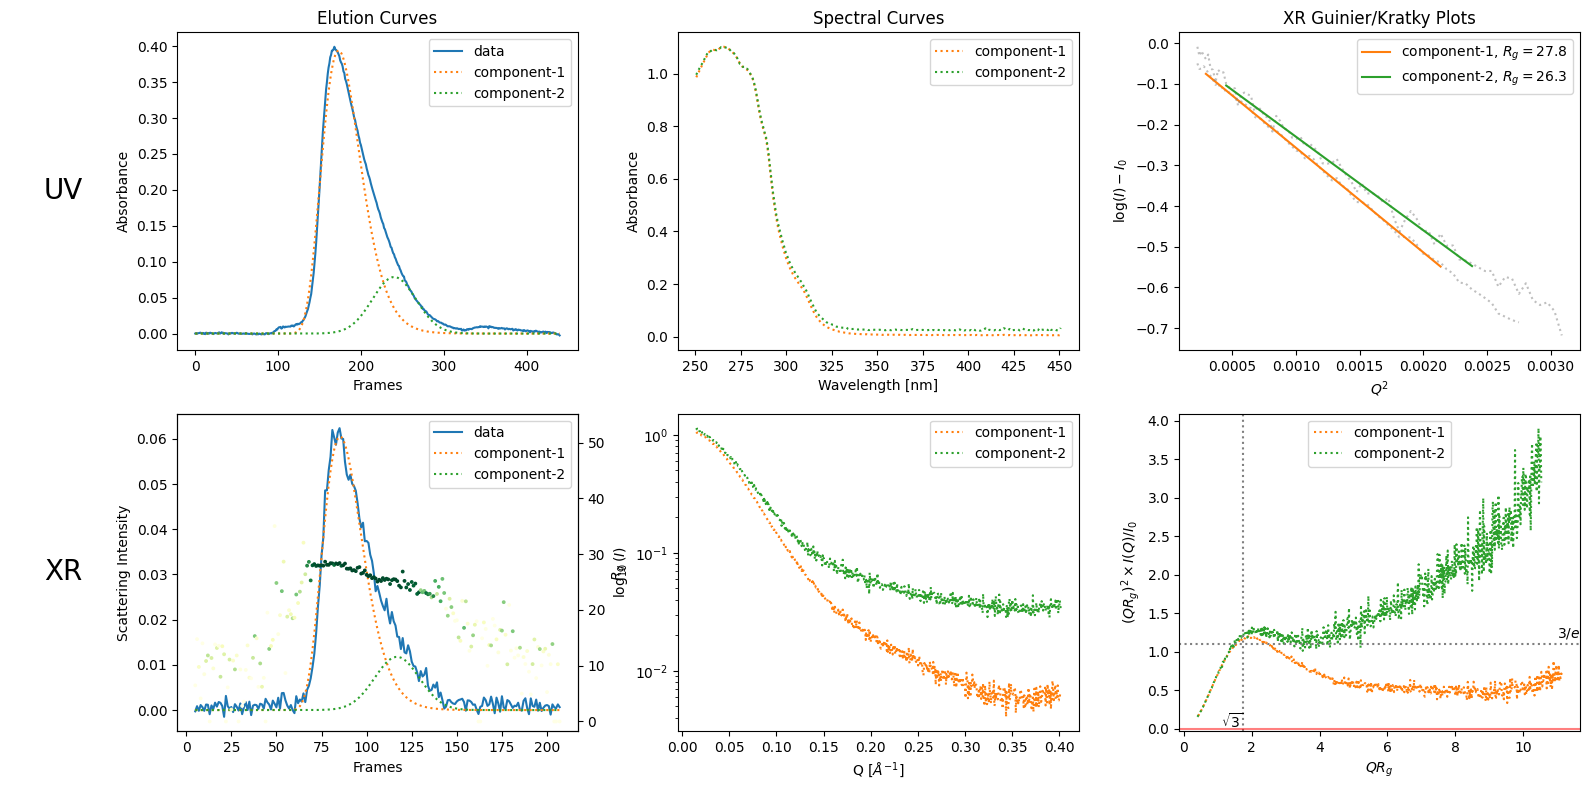

In [8]:
decomposition2_1 = corrected_ssd.quick_decomposition(num_components=2, randomize=0.01, seed=1)
decomposition2_1.plot_components(rgcurve=rgcurve);

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


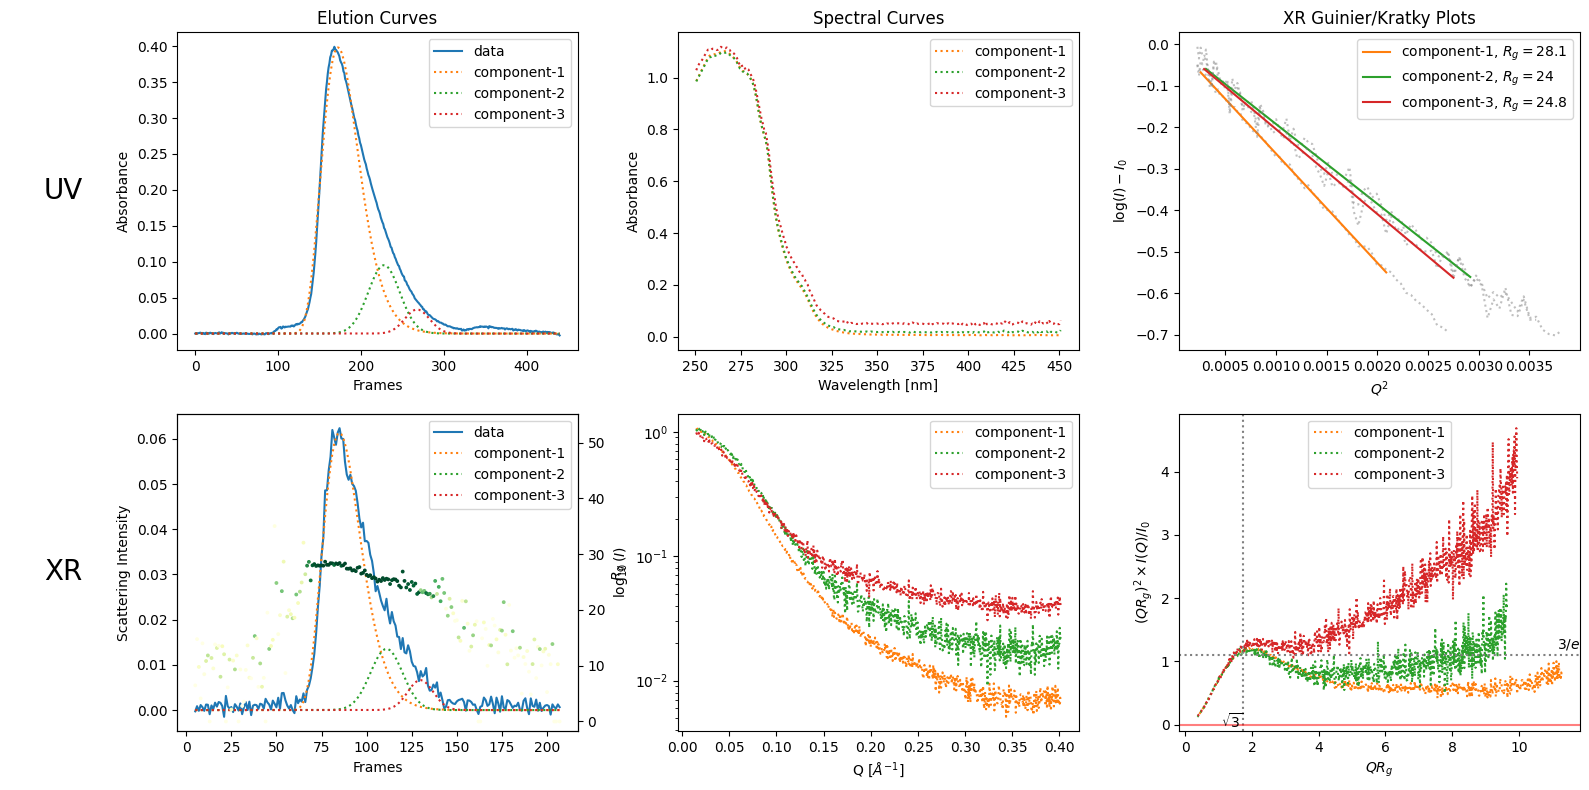

In [9]:
decomposition3 = corrected_ssd.quick_decomposition(num_components=3)
decomposition3.plot_components(rgcurve=rgcurve);

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


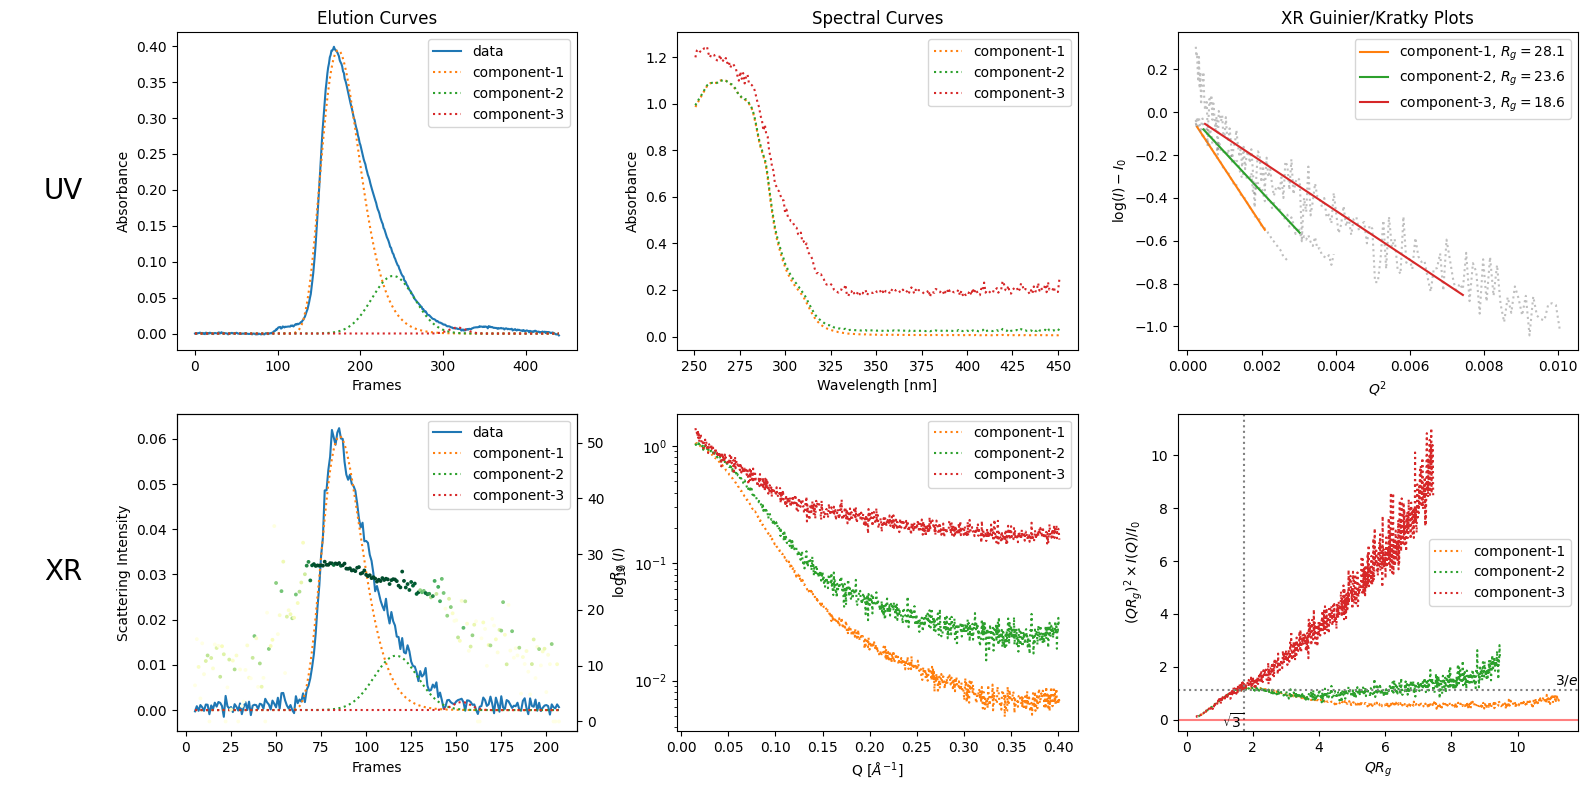

In [10]:
decomposition3_1 = corrected_ssd.quick_decomposition(num_components=3, randomize=0.01, seed=1)
decomposition3_1.plot_components(rgcurve=rgcurve);

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


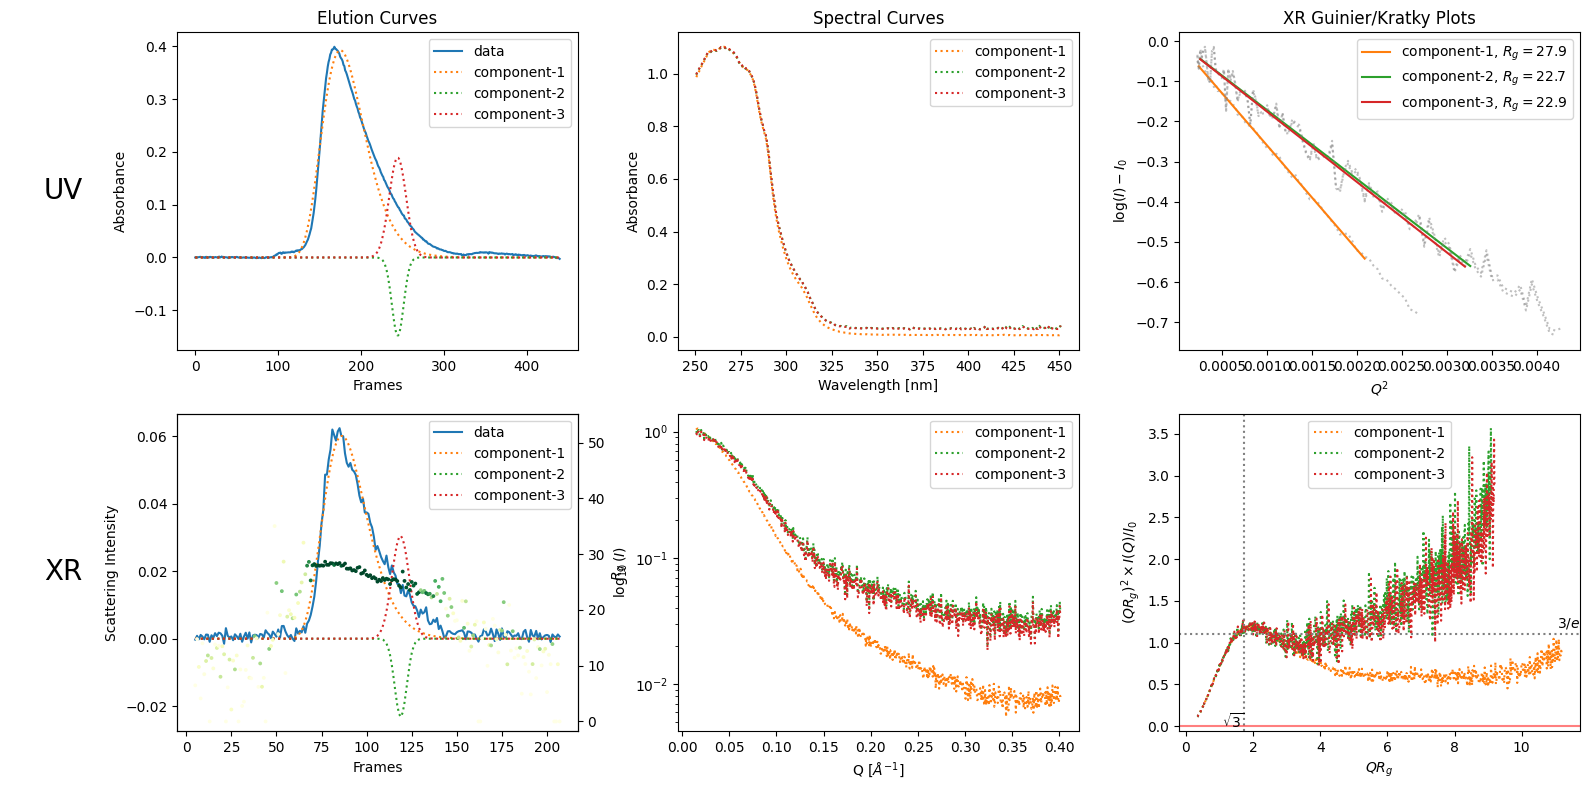

In [11]:
decomposition3_6 = corrected_ssd.quick_decomposition(num_components=3, randomize=0.01, seed=6)
decomposition3_6.plot_components(rgcurve=rgcurve);

In [12]:
if False:
    # Global optimization
    decomposition3_g = corrected_ssd.quick_decomposition(num_components=3, global_opt=True)
    decomposition3_g.plot_components(rgcurve=rgcurve);